# Kaggle Titanic

### Pre-processing the data

In [12]:
#Let's import the different libraries we will be using
import numpy as np
import pandas as pd

In [13]:
data_df = pd.read_csv('data/train.csv')

### Data Dictionary

survival ->	Survival -> 0 = No, 1 = Yes

sex ->	Sex	

Pclass	-> Ticket class	-> 1 = 1st, 2 = 2nd, 3 = 3rd

Age ->	Age in years	

sibsp	-> # of siblings / spouses aboard the Titanic	

parch	-> # of parents / children aboard the Titanic	

ticket	-> Ticket number	

fare	-> Passenger fare	

cabin	-> Cabin number	

embarked ->	Port of Embarkation ->	C = Cherbourg, Q = Queenstown, S = Southampton

In [14]:
data_df.isnull().sum()
#Only 2 values in Embarked are missing. it's only 0.2% of the values.. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
et=pd.get_dummies(data_df['Embarked'])
et.sum()

C    168
Q     77
S    644
dtype: int64

###### Null values
Let's drop the columns Cabin ( around 76% of the values are null )
We have 20% of Age data that is missing too. But the age in the Titanic event was important. So let's try to fill the blanks with the mean value
For Embarked column, only 2 values are null. Since the category `S`is majoritory, let's fill the blanks with this value

In [16]:
data_df = data_df.drop(['Cabin'], axis=1)
data_df['Age'].fillna(data_df['Age'].mean(),inplace=True)
data_df['Embarked'].fillna('S', inplace=True)

In [29]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
data_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Let's take a look at our data graphically

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

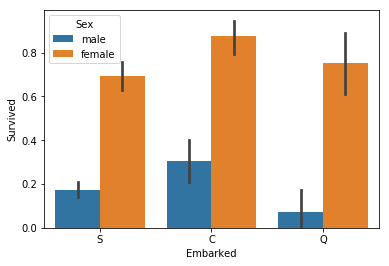

In [54]:
sns.barplot(x="Embarked", y="Survived", data=data_df, hue="Sex")

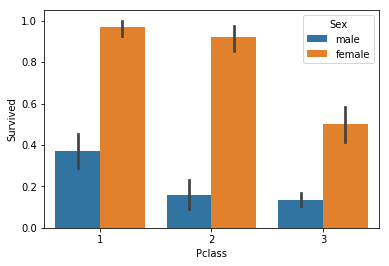

In [59]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data_df)


In [50]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
data_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(data_df.Survived, data_df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
data_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data_df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
data_df.Age[data_df.Pclass == 1].plot(kind='kde')    
data_df.Age[data_df.Pclass == 2].plot(kind='kde')
data_df.Age[data_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
data_df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data_df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")


Text(0.5,1,'Passengers per boarding location')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [80]:
#Hot-encoding Gender values to columns female (no need for a column male since the values are complementary)

data_df.loc[data_df['Sex'] == "female", 'female'] = 1
data_df.loc[data_df['Sex'] == "male", 'female'] = 0

data_df = data_df.drop(['Sex'], axis=1)

In [87]:
#Hot-encoding Embarked column
#embarked -> Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton
data_df.loc[data_df['Embarked'] == "C", 'C'] = 1
data_df.loc[data_df['Embarked'] == "Q", 'C'] = 0
data_df.loc[data_df['Embarked'] == "S", 'C'] = 0
data_df.loc[data_df['Embarked'] == "Q", 'Q'] = 1
data_df.loc[data_df['Embarked'] == "C", 'Q'] = 0
data_df.loc[data_df['Embarked'] == "S", 'Q'] = 0

data_df = data_df.drop(['Embarked'], axis=1)

In [81]:
#Getting rid of useless columns:
data_df = data_df.drop(['Name', 'Ticket'], axis=1)

In [82]:
#Let's isolate the values Survived that we want to predict and drop them from our training dataset
y_pred = data_df.filter(['PassengerId', 'Survived'])
data_df = data_df.drop(['Survived'], axis=1)


In [88]:
data_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,1,3,22.000000,1,0,7.2500,0.0,0.0,0.0
1,2,1,38.000000,1,0,71.2833,1.0,1.0,0.0
2,3,3,26.000000,0,0,7.9250,1.0,0.0,0.0
3,4,1,35.000000,1,0,53.1000,1.0,0.0,0.0
4,5,3,35.000000,0,0,8.0500,0.0,0.0,0.0
5,6,3,29.699118,0,0,8.4583,0.0,0.0,1.0
6,7,1,54.000000,0,0,51.8625,0.0,0.0,0.0
7,8,3,2.000000,3,1,21.0750,0.0,0.0,0.0
8,9,3,27.000000,0,2,11.1333,1.0,0.0,0.0
9,10,2,14.000000,1,0,30.0708,1.0,1.0,0.0


In [100]:
# Converting our data to arrays
x = data_df.values
y = y_pred.values
#Converting float values to int
x.astype('int')
y.astype('int')

array([[  1,   0],
       [  2,   1],
       [  3,   1],
       ..., 
       [889,   0],
       [890,   1],
       [891,   0]])